Nama : Jeremia Manurung

NIM : 25/563379/PPA/07110

Kelas : Magister Ilmu Komputer

Mat.Kul : Pengolahan dan Analisis Citra Digital

In [2]:
!rm -rf images

In [3]:
!git clone https://github.com/jeremia49/PACD-MII226895 pacd

Cloning into 'pacd'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 5), reused 13 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 3.34 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [4]:
!mv  pacd/* .

In [5]:
!rm -rf pacd

**Question:**

Implement one of the segmentation methods and several operation of morphological methods without using library. Comparing the segmentation result with and without applying morphological processing.

Create your notebook with name as "PCD_Assignment03". You need to provide your Github link to the text editor in submission form.

**Answer:**

Original Image

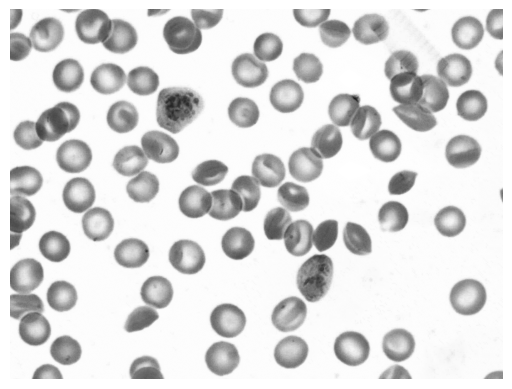

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

img=Image.open('./images/redbloodcells.png')
img = np.array(img)
h, w = len(img), len(img[0])

img = 0.2989 * img[:, :, 0] + 0.5870 * img[:, :, 1] + 0.1140 * img[:, :, 2]

plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [2]:
img.shape

(1200, 1600)

**Segmented Image using Otsu Method**

In [3]:
def otsu(image):
    flat = [pixel for row in image for pixel in row]

    hist = [0] * 256
    for value in flat:
        hist[int(value)] += 1

    total_pixels = len(flat)

    hist_norm = [h / total_pixels for h in hist]

    cumulative = [0] * 256
    cumulative_mean = [0] * 256

    cumulative[0] = hist_norm[0]
    cumulative_mean[0] = 0 * hist_norm[0]

    for i in range(1, 256):
        cumulative[i] = cumulative[i - 1] + hist_norm[i]
        cumulative_mean[i] = cumulative_mean[i - 1] + i * hist_norm[i]

    global_mean = cumulative_mean[-1]

    sigma_b_squared = [0] * 256
    for t in range(256):
        if cumulative[t] == 0 or cumulative[t] == 1:
            sigma_b_squared[t] = 0
            continue
        numerator = (global_mean * cumulative[t] - cumulative_mean[t]) ** 2
        denominator = cumulative[t] * (1 - cumulative[t])
        sigma_b_squared[t] = numerator / denominator

    threshold = sigma_b_squared.index(max(sigma_b_squared))

    return threshold

In [4]:
def segment(image):
  binary_image = np.zeros_like(image, dtype=np.uint8)
  binary_image[image > otsu(image)] = 255
  return binary_image

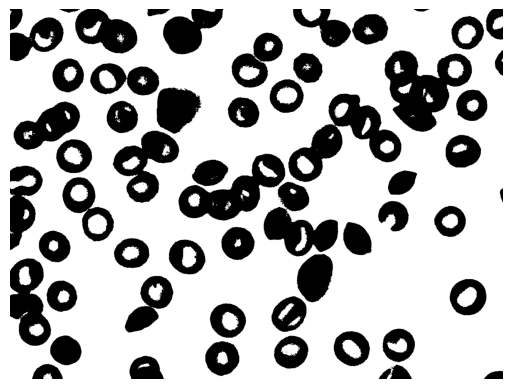

In [5]:
plt.figure()
plt.imshow(segment(img), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

**Morphological Processing**

**1. Erosi**

In [6]:
def erosi(image, kernel, padding=0):
    image_padded = np.pad(image, padding, mode='constant', constant_values=0)
    kernel_height, kernel_width = kernel.shape
    imheight, imwidth = image.shape

    output = np.zeros((imheight, imwidth), dtype=np.uint8)

    for y in range(imheight):
        for x in range(imwidth):
            region = image_padded[
                y : y + kernel_height,
                x : x + kernel_width
            ]

            semuaBenar = True
            for a in range(region.shape[0]):
              for b in range(region.shape[1]):
                if(kernel[a][b] == 1):
                  if(region[a][b] != 255):
                    semuaBenar = False
                    break

            if semuaBenar:
              output[y, x] = 255
            else:
              output[y, x] = 0

    return output

In [7]:
kernel = [
    [1,0,1],
    [1,1,1],
    [1,0,1],
    ]

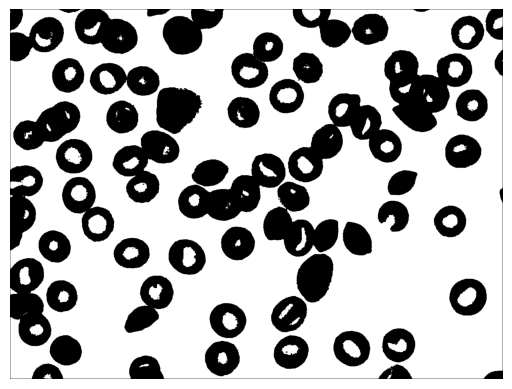

In [8]:
plt.figure()
plt.imshow(erosi(segment(img), np.array(kernel), 1), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

**2. Dilasi**

In [9]:
def dilasi(image, kernel, padding=0):
    image_padded = np.pad(image, padding, mode='constant', constant_values=0)
    kernel_height, kernel_width = kernel.shape
    imheight, imwidth = image.shape

    output = np.zeros((imheight, imwidth), dtype=np.uint8)

    for y in range(imheight):
        for x in range(imwidth):
            region = image_padded[
                y : y + kernel_height,
                x : x + kernel_width
            ]


            salahSatuBenar = False
            for a in range(region.shape[0]):
              for b in range(region.shape[1]):
                if(kernel[a][b] == 1):
                  if(region[a][b] == 255):
                    salahSatuBenar = True
                    break

            if salahSatuBenar :
                output[y, x] = 255
            else:
                output[y, x] = 0

    return output

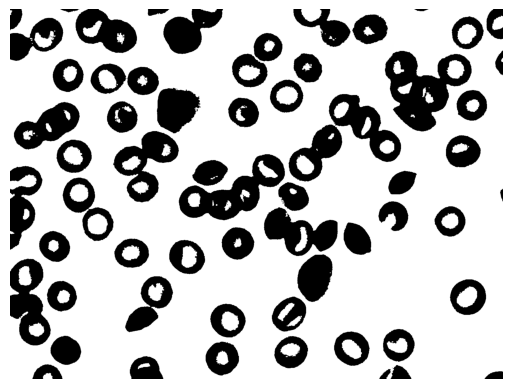

In [10]:
plt.figure()
plt.imshow(dilasi(segment(img), np.array(kernel), 1), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

**3. Opening**

In [11]:
def opening(image, kernel, padding=0):
  return dilasi(erosi(image, kernel, padding),kernel, padding)

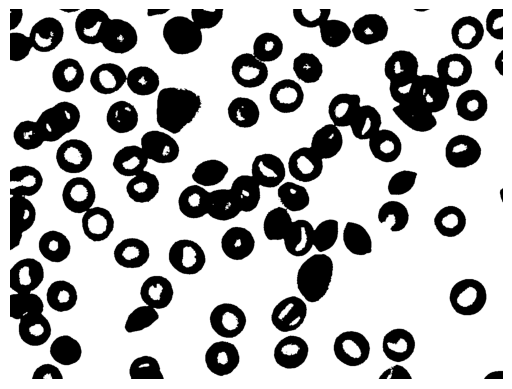

In [12]:
plt.figure()
plt.imshow(opening(segment(img), np.array(kernel), 1), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

**4. Closing**

In [13]:
def closing(image, kernel, padding=0):
  return erosi(dilasi(image, kernel, padding),kernel, padding)

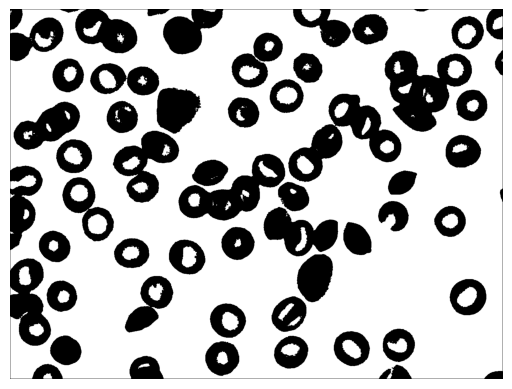

In [14]:
plt.figure()
plt.imshow(closing(segment(img), np.array(kernel), 1), cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()